In [6]:
!pip install gensim


In [7]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [8]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [9]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them

#I chose the word "university", and the most similar words returned were "college", "universities" and "campus".

#Share and discuss with your group

In [10]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [11]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [12]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data?  

#I used cats - cat to get a vector of plurals, added it to dog, and got words like dogs and puppies. It shows that the model is not significantly biased.

# Discuss with your group and share most interesting dimension in the document

Part 2: Visualization and Embeddings in Space

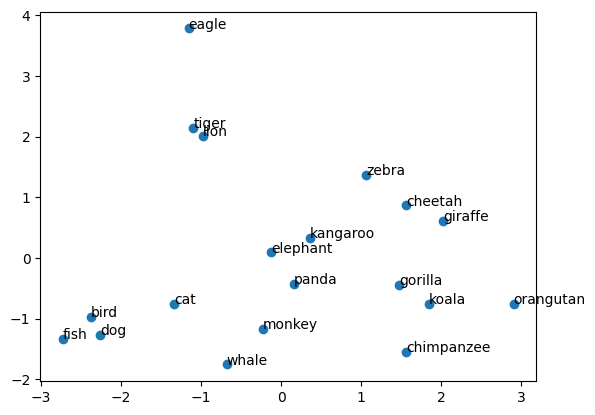

In [13]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [14]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.




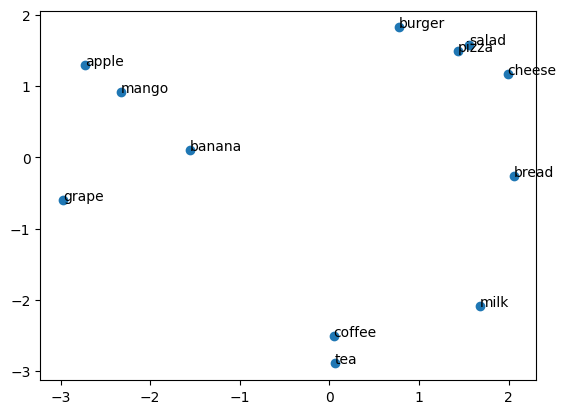

In [15]:
words = ["apple", "banana", "grape", "mango", "bread", "cheese", "pizza", "burger", "salad", "milk", "coffee", "tea"]

X = [model[word] for word in words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.show()


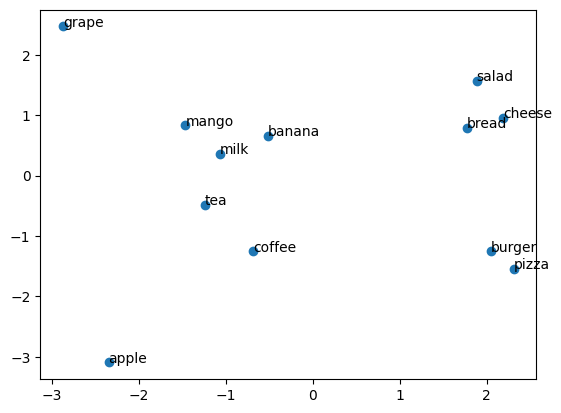

In [16]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

words = ["apple", "banana", "grape", "mango", "bread", "cheese", "pizza", "burger", "salad", "milk", "coffee", "tea"]
X = [twitter_model[word] for word in words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.show()

Part 3: Embedding reddit posts

In [17]:
import pandas as pd

#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [18]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import re
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['clean_text'] = data['text'].astype(str).apply(clean_text)

vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(data['clean_text'])

print(X_bow.shape)



(9450, 1000)


In [19]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

#The two subreddits are not clearly separated in the figure

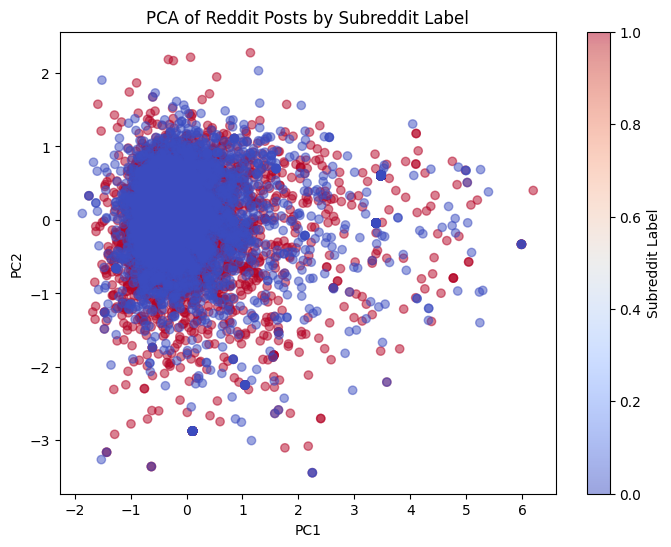

In [20]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

avg_embeddings = [avg_embedding(text, model) for text in data['clean_text']]
avg_embeddings = [vec for vec in avg_embeddings if not np.isnan(vec).any()]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

labels = data['label'].values[:len(X_pca)]

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='coolwarm', alpha=0.5)
plt.title("PCA of Reddit Posts by Subreddit Label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Subreddit Label")
plt.show()


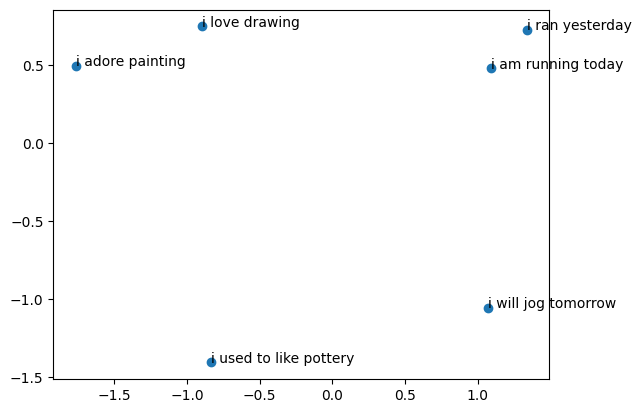

In [21]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\owenh\anaconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\owenh\anaconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


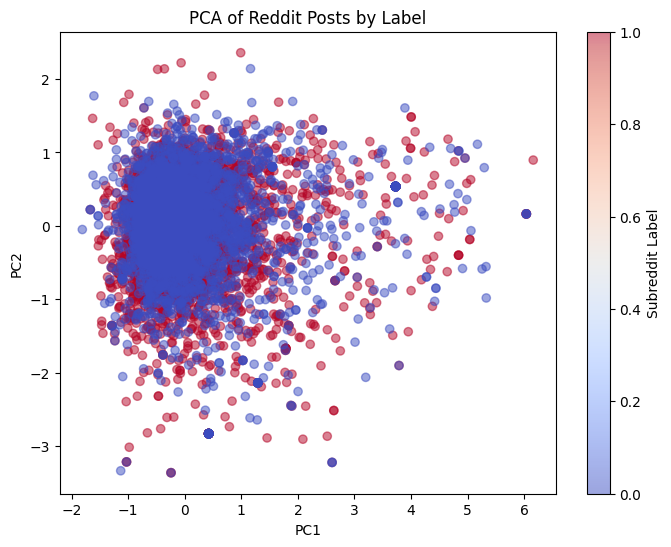

In [22]:
avg_embeddings = [avg_embedding(text, model) for text in data['clean_text']]
avg_embeddings = [vec for vec in avg_embeddings if not np.isnan(vec).any()]

X_pca = PCA(n_components=2).fit_transform(avg_embeddings)
labels = data['label'].values[:len(X_pca)]

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='coolwarm', alpha=0.5)
plt.title("PCA of Reddit Posts by Label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Subreddit Label")
plt.show()

In [23]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

#The distributions of the two subreddits are largely mixed, with no clear separation

Part 4: HuggingFace and BERT

In [24]:
!pip install transformers

In [25]:
!pip install torch

In [26]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.6.0+cpu
False


In [27]:
from transformers import pipeline

pipe = pipeline(
    "text-classification",
    model="finiteautomata/bertweet-base-sentiment-analysis",
    framework="pt"
)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [28]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline(
    "text-classification",
    model="finiteautomata/bertweet-base-sentiment-analysis",
    framework="pt"
)

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [29]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [30]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [33]:
import pandas as pd
from transformers import pipeline

uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

mich = mich.sample(n=4725)
uiuc["label"] = 1
mich["label"] = 0

data = pd.concat([uiuc, mich])

pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

def safe_sentiment(x):
    try:
        return pipe(x)[0]['label']
    except:
        return 'UNKNOWN'

data['sentiment'] = data['text'].astype(str).apply(safe_sentiment)

print(data['sentiment'].value_counts())

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (299 > 128). Running this sequence through the model will result in indexing errors


sentiment
NEU        4674
NEG        2231
POS        1933
UNKNOWN     612
Name: count, dtype: int64


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

#The POS ones were clearly positive, and the NEU ones just stated facts. 

In [34]:
sample = data[['text', 'sentiment']].sample(10, random_state=42)

for i, row in sample.iterrows():
    print(f"[{row['sentiment']}] {row['text'][:200]}...\n")

[NEG] Not serious...

[NEU] They've told me and others that charges arn't finalized yet and we'll get an itemized receipt when they are (imo to get the heat off them until they decide they're all actually final later)...

[NEU] The break ins that happen on and around campus are usually because someone left the door or window unlocked. Could be that the person was checking for unlocked doors. Make sure to remember to keep it ...

[POS] There's no shortage of parking downtown at low or no cost....

[POS] Thank you so much! I am definitely applying to multiple places at once like Wayne State University as well with U of M and thanks so much for letting me know about other means of getting financial ass...

[NEU] [deleted]...

[NEU] ya just get a hold of someone, it’ll be ok.  remember, they want ur money, they aren’t just gonna say nvm u can’t come. if you can go in person i would, if not then call or get on a zoom.  they’ll wor...

[NEG] Yes it is proulx. I believe he is only one teachin

In [36]:
#is the UIUC or Michigan subreddit more negative?

#The Michigan subreddit is slightly more negative than UIUC

In [35]:
neg_counts = data[data['sentiment'] == 'NEG']['label'].value_counts()
print(neg_counts)

label
0    1123
1    1108
Name: count, dtype: int64
